In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Load Data

In [2]:
medicaidppv = pd.read_json("https://health.data.ny.gov/resource/cr7a-34ka.json")
ppv = pd.read_json("https://health.data.ny.gov/resource/f8ue-xzy3.json")
income = pd.read_json("https://data.ny.gov/resource/5kgr-h5g5.json")

In [3]:
medicaidppv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 9 columns):
difference_in_rates           496 non-null float64
dual_status                   504 non-null object
expected_rate_per_100         496 non-null float64
medicaid_county_population    504 non-null int64
medicaid_ppv_events           504 non-null int64
observed_rate_per_100         504 non-null float64
patient_county                504 non-null object
risk_adjusted_rate_per_100    496 non-null float64
year                          504 non-null int64
dtypes: float64(4), int64(3), object(2)
memory usage: 35.5+ KB


In [4]:
ppv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 7 columns):
adjusted_rate_per_100    378 non-null float64
difference_in_rates      377 non-null float64
discharge_year           378 non-null int64
expected_rate_per_100    378 non-null float64
observed_rate_per_100    378 non-null float64
patient_county_name      378 non-null object
software_version         378 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 20.8+ KB


In [5]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
deductions_of_all_returns_in_thousands              974 non-null float64
dependent_exemptions_of_all_returns_in_thousands    974 non-null float64
disclosure                                          26 non-null object
income_class                                        1000 non-null object
income_class_sort_order                             1000 non-null int64
number_of_all_returns                               974 non-null float64
ny_agi_of_all_returns_in_thousands                  974 non-null float64
place_of_residence                                  1000 non-null object
place_of_residence_sort_order                       1000 non-null int64
tax_before_credits_of_all_returns_in_thousands      974 non-null float64
tax_liability_of_all_returns_in_thousands           974 non-null float64
tax_year                                            1000 non-null int64
taxable_income_of_all_r

### Clean & Check Data

#### Check the Years for Both Dataset

In [6]:
ppv.discharge_year.unique()

array([2016, 2015, 2014, 2013, 2012, 2011])

In [7]:
medicaidppv.year.unique()

array([2014, 2013, 2012, 2011])

In [8]:
income.tax_year.unique()

array([2014, 2013])

Since for the Income tax dataset, it only contains the tax year of 2013 and 2014, I will remove the other years data in PPV dataset.

In [9]:
ppv2013 = ppv[ppv.discharge_year == 2013]
ppv2014 = ppv[ppv.discharge_year == 2014]
medicaidppv2013 = medicaidppv[medicaidppv.year == 2013]
medicaidppv2014 = medicaidppv[medicaidppv.year == 2014]
income2013 = income[income.tax_year == 2013]
income2014 = income[income.tax_year == 2014]

#### Check the Distinct Entries for Each Year for Both Dataset

In [10]:
len(ppv2013), len(ppv2014), len(medicaidppv2013), len(medicaidppv2014), len(income2013), len(income2014)

(63, 63, 189, 189, 90, 910)

In [11]:
income2013.place_of_residence.unique()

array(['New York City - Bronx', 'New York City - Kings',
       'New York City - Manhattan', 'New York City - Queens',
       'New York City - Richmond', 'Albany', 'Allegany'], dtype=object)

In [12]:
income2014.place_of_residence.unique()

array(['New York City - Bronx', 'New York City - Kings',
       'New York City - Manhattan', 'New York City - Queens',
       'New York City - Richmond', 'Albany', 'Allegany', 'Broome',
       'Cattaraugus', 'Cayuga', 'Chautauqua', 'Chemung', 'Chenango',
       'Clinton', 'Columbia', 'Cortland', 'Delaware', 'Dutchess', 'Erie',
       'Essex', 'Franklin', 'Fulton', 'Genesee', 'Greene', 'Hamilton',
       'Herkimer', 'Jefferson', 'Lewis', 'Livingston', 'Madison',
       'Monroe', 'Montgomery', 'Nassau', 'Niagara', 'Oneida', 'Onondaga',
       'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego', 'Putnam',
       'Rensselaer', 'Rockland', 'St. Lawrence', 'Saratoga',
       'Schenectady', 'Schoharie', 'Schuyler', 'Seneca', 'Steuben',
       'Suffolk', 'Sullivan', 'Tioga', 'Tompkins', 'Ulster', 'Warren',
       'Washington', 'Wayne', 'Westchester', 'Wyoming', 'Yates',
       'NYS Unclassified +', 'Residence Unknown ++',
       'Grand Total, Full-Year Resident'], dtype=object)

In [13]:
income2014.place_of_residence.nunique()

65

In [14]:
income2013.groupby("place_of_residence").place_of_residence.count()

place_of_residence
Albany                       14
Allegany                      6
New York City - Bronx        14
New York City - Kings        14
New York City - Manhattan    14
New York City - Queens       14
New York City - Richmond     14
Name: place_of_residence, dtype: int64

In [15]:
income2014.groupby("place_of_residence").place_of_residence.count().unique()

array([14])

In [16]:
income2014[income2014.place_of_residence == 'Wayne']

,deductions_of_all_returns_in_thousands,dependent_exemptions_of_all_returns_in_thousands,disclosure,income_class,income_class_sort_order,number_of_all_returns,ny_agi_of_all_returns_in_thousands,place_of_residence,place_of_residence_sort_order,tax_before_credits_of_all_returns_in_thousands,tax_liability_of_all_returns_in_thousands,tax_year,taxable_income_of_all_returns_in_thousands
812,10107.416,0.000,NaN,"Under 5,000",1,6289.0,-325.842,Wayne,60,23.879,-664.293,2014,596.150
813,22707.257,46.163,NaN,"5,000 - 9,999",2,3702.0,27379.399,Wayne,60,185.067,-519.209,2014,4625.979
814,58310.327,2003.991,NaN,"10,000 - 19,999",3,6230.0,92713.970,Wayne,60,1316.464,-1367.945,2014,32399.652
815,57824.417,3000.698,NaN,"20,000 - 29,999",4,5544.0,137173.327,Wayne,60,3387.094,850.155,2014,76348.212
816,47752.543,2613.113,NaN,"30,000 - 39,999",5,4286.0,149074.071,Wayne,60,4751.103,3284.420,2014,98708.415
817,40680.087,2182.000,NaN,"40,000 - 49,999",6,3374.0,151354.226,Wayne,60,5479.686,4609.331,2014,108492.139
818,34634.272,1848.000,NaN,"50,000 - 59,999",7,2590.0,142115.178,Wayne,60,5478.048,4902.845,2014,105632.906
819,42563.590,2410.000,NaN,"60,000 - 74,999",8,2942.0,197476.504,Wayne,60,8161.001,7315.809,2014,152502.914
820,54256.043,3118.000,NaN,"75,000 - 99,999",9,3424.0,296463.145,Wayne,60,13327.557,12286.912,2014,239089.102
821,67680.975,4161.000,NaN,"100,000 - 199,999",10,3784.0,490051.981,Wayne,60,25708.747,24391.925,2014,418210.006


In [17]:
income2013[income2013.place_of_residence == 'Allegany']

,deductions_of_all_returns_in_thousands,dependent_exemptions_of_all_returns_in_thousands,disclosure,income_class,income_class_sort_order,number_of_all_returns,ny_agi_of_all_returns_in_thousands,place_of_residence,place_of_residence_sort_order,tax_before_credits_of_all_returns_in_thousands,tax_liability_of_all_returns_in_thousands,tax_year,taxable_income_of_all_returns_in_thousands
994,4967.436,0.000,NaN,"Under 5,000",1,3237.0,-1014.940,Allegany,8,8.972,-322.959,2013,224.278
995,11325.514,28.277,NaN,"5,000 - 9,999",2,1742.0,12930.142,Allegany,8,63.082,-334.476,2013,1576.351
996,29509.870,1174.443,NaN,"10,000 - 19,999",3,3002.0,44536.630,Allegany,8,562.064,-915.704,2013,13852.317
997,23876.684,1501.218,NaN,"20,000 - 29,999",4,2125.0,52710.354,Allegany,8,1202.540,75.088,2013,27332.452
998,20303.756,1278.000,NaN,"30,000 - 39,999",5,1732.0,60638.996,Allegany,8,1853.317,1137.468,2013,39057.240
999,18319.016,1062.000,NaN,"40,000 - 49,999",6,1468.0,65756.111,Allegany,8,2309.766,1846.748,2013,46375.095


In [18]:
ppv2014.patient_county_name.unique()

array(['Albany', 'Allegany', 'Bronx', 'Broome', 'Cattaraugus', 'Cayuga',
       'Chautauqua', 'Chemung', 'Chenango', 'Clinton', 'Columbia',
       'Cortland', 'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin',
       'Fulton', 'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson',
       'Kings', 'Lewis', 'Livingston', 'Madison', 'Monroe', 'Montgomery',
       'Nassau', 'New York', 'New York State', 'Niagara', 'Oneida',
       'Onondaga', 'Ontario', 'Orange', 'Orleans', 'Oswego', 'Otsego',
       'Putnam', 'Queens', 'Rensselaer', 'Richmond', 'Rockland',
       'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler', 'Seneca',
       'Steuben', 'St Lawrence', 'Suffolk', 'Sullivan', 'Tioga',
       'Tompkins', 'Ulster', 'Warren', 'Washington', 'Wayne',
       'Westchester', 'Wyoming', 'Yates'], dtype=object)

In [19]:
ppv2014.groupby("patient_county_name").patient_county_name.count().unique()

array([1])

In [20]:
medicaidppv2014.patient_county.unique()

array(['Albany ', 'Allegany ', 'Bronx ', 'Broome ', 'Cattaraugus ',
       'Cayuga ', 'Chautauqua ', 'Chemung ', 'Chenango ', 'Clinton ',
       'Columbia ', 'Cortland ', 'Delaware ', 'Dutchess ', 'Erie ',
       'Essex ', 'Franklin ', 'Fulton ', 'Genesee ', 'Greene ',
       'Hamilton ', 'Herkimer ', 'Jefferson ', 'Kings ', 'Lewis ',
       'Livingston ', 'Madison ', 'Monroe ', 'Montgomery ', 'Nassau ',
       'New York ', 'Niagara ', 'Oneida ', 'Onondaga ', 'Ontario ',
       'Orange ', 'Orleans ', 'Oswego ', 'Otsego ', 'Putnam ', 'Queens ',
       'Rensselaer ', 'Richmond ', 'Rockland ', 'Saratoga ',
       'Schenectady ', 'Schoharie ', 'Schuyler ', 'Seneca ', 'Statewide',
       'Steuben ', 'St Lawrence ', 'Suffolk ', 'Sullivan ', 'Tioga ',
       'Tompkins ', 'Ulster ', 'Warren ', 'Washington ', 'Wayne ',
       'Westchester ', 'Wyoming ', 'Yates '], dtype=object)

In [21]:
medicaidppv2014.groupby("patient_county").patient_county.count().unique()

array([3])

In [22]:
medicaidppv2014[medicaidppv2014.patient_county == 'Wayne ']

,difference_in_rates,dual_status,expected_rate_per_100,medicaid_county_population,medicaid_ppv_events,observed_rate_per_100,patient_county,risk_adjusted_rate_per_100,year
177,-6.04,Non-Dual,30.27,18590,4504,24.23,Wayne,25.49,2014
178,-2.07,Dual,28.21,3922,1025,26.13,Wayne,22.20,2014
179,-5.26,Total,29.82,22512,5529,24.56,Wayne,25.34,2014


Since the income tax data for 2013 only contain the county on the New York Island, and doesn't contain all the income class, I will use 2014 data.

#### Format the County Columns as Same

In [23]:
income2014['county_name'] = income2014.place_of_residence \
                                       .str.replace('New York City - ', '') \
                                       .str.replace('Manhattan', 'New York') \
                                       .str.replace('.', '')

/Users/crystal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
medicaidppv2014['patient_county_name'] = medicaidppv2014.patient_county.str.rstrip(' ')

/Users/crystal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


### Data Exploratory

#### PPV

In [25]:
ppv2014.to_csv("ppv2014.csv")

#### Medicaid PPV

In [32]:
medicaidppv2014total = medicaidppv2014[medicaidppv2014.dual_status == 'Total ']

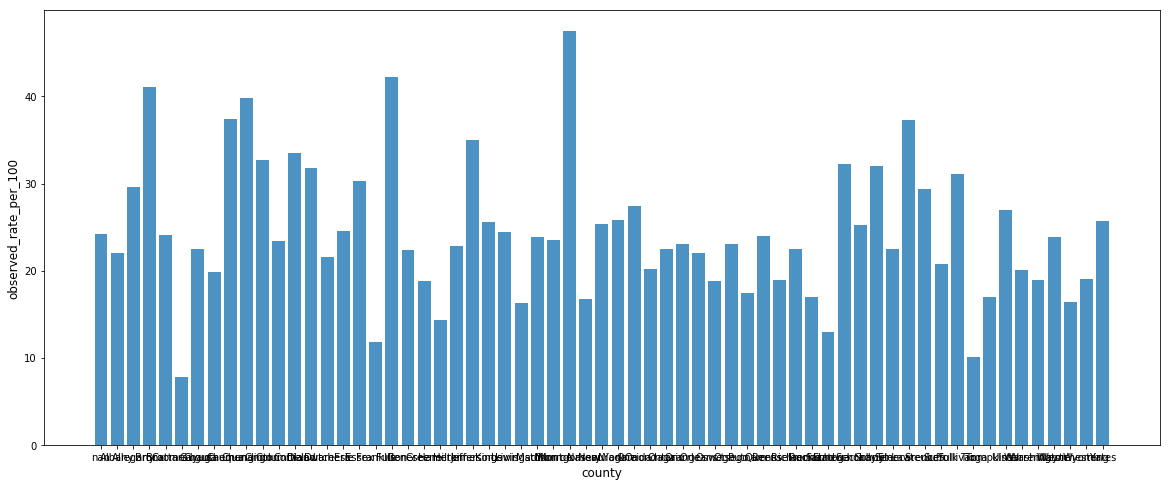

In [232]:
plt.figure(figsize=(20,8))
plt.bar(joined_data['clean_county'], joined_data['observed_rate_per_100'], alpha=0.8)
plt.xlabel('county', fontsize=12)
plt.ylabel('observed_rate_per_100', fontsize=12)
plt.show()

#### Join 2 PPV datasets

In [33]:
joinedppv = ppv2014[['observed_rate_per_100', 'patient_county_name']] \
                .merge(medicaidppv2014total[['patient_county_name', 'observed_rate_per_100']],
                       on='patient_county_name', how='left')

In [34]:
joinedppv.rename({'observed_rate_per_100_x': 'observed_rate_per_100_all_payer',
                  'observed_rate_per_100_y': 'observed_rate_per_100_medicaid'},
                 axis='columns',
                 inplace = True)
joinedppv['difference_in_rates'] = joinedppv['observed_rate_per_100_medicaid'] - joinedppv['observed_rate_per_100_all_payer']
joinedppv = joinedppv[joinedppv.patient_county_name != 'New York State']
joinedppv = joinedppv.round({'difference_in_rates': 2})

In [35]:
joinedppv.to_csv("joinedppv2014.csv")

##### Check distribution of both PPV rates

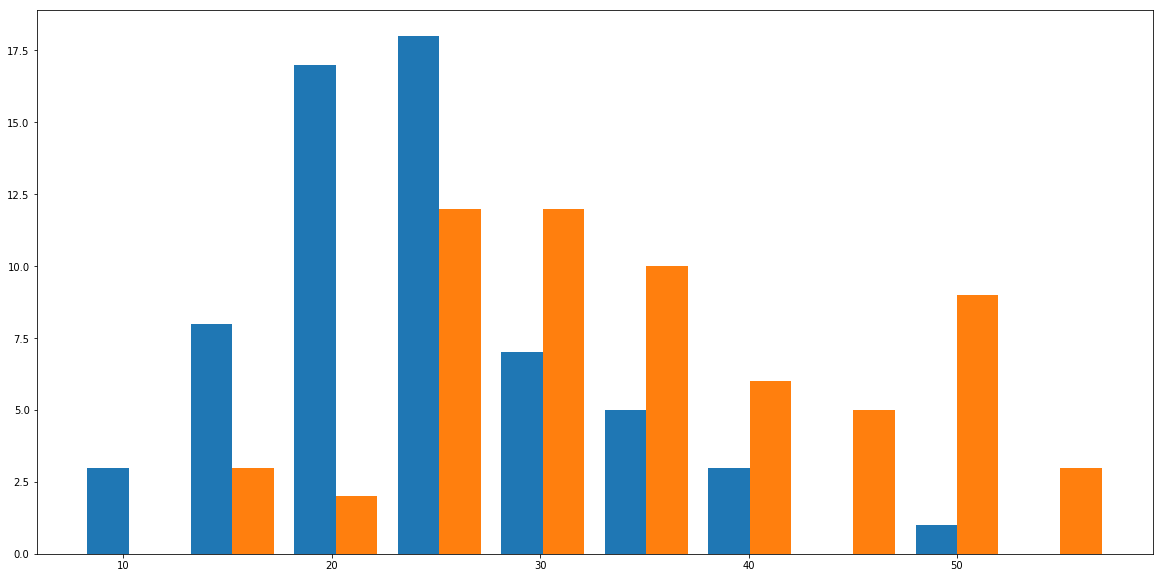

In [36]:
plt.figure(figsize=(20, 10))
plt.hist([joinedppv["observed_rate_per_100_all_payer"], joinedppv["observed_rate_per_100_medicaid"]])
plt.show()

In [67]:
ppv2014[ppv2014.observed_rate_per_100<10]

,adjusted_rate_per_100,difference_in_rates,discharge_year,expected_rate_per_100,observed_rate_per_100,patient_county_name,software_version
130,8.22,-15.16,2014,22.92,7.77,Cattaraugus,1.31


In [68]:
ppv2014[ppv2014.observed_rate_per_100>45]

,adjusted_rate_per_100,difference_in_rates,discharge_year,expected_rate_per_100,observed_rate_per_100,patient_county_name,software_version
154,55.93,26.93,2014,20.63,47.56,Montgomery,1.31


##### Output PPV data to echarts boxplot format

In [77]:
joinedppv.observed_rate_per_100_all_payer.values

array([22.01, 29.66, 41.09, 24.09,  7.77, 22.52, 19.82, 37.43, 39.85,
       32.67, 23.39, 33.49, 31.82, 21.55, 24.52, 30.32, 11.83, 42.26,
       22.33, 18.78, 14.35, 22.84, 35.  , 25.57, 24.43, 16.29, 23.87,
       23.56, 47.56, 16.69, 25.41, 25.77, 27.45, 20.22, 22.45, 23.09,
       22.  , 18.83, 23.04, 17.38, 24.03, 18.98, 22.53, 16.98, 13.  ,
       32.28, 25.22, 32.01, 22.48, 29.4 , 37.3 , 20.79, 31.05, 10.04,
       16.96, 26.94, 20.08, 18.92, 23.83, 16.35, 18.99, 25.75])

In [78]:
joinedppv.observed_rate_per_100_medicaid.values

array([48.78, 36.88, 37.  , 29.77, 37.26, 39.64, 44.97, 57.1 , 50.79,
       44.23, 39.82, 30.07, 47.78, 33.15, 28.77, 49.82, 36.71, 49.14,
       43.41, 29.  , 15.94, 31.51, 52.23, 24.44, 39.83, 32.22, 45.48,
       30.42, 48.25, 24.1 , 38.6 , 31.55, 38.66, 37.47, 33.66, 24.63,
       26.04, 32.59, 30.93, 27.58, 24.26, 56.05, 27.17, 16.75, 26.91,
       48.76, 34.47, 48.16, 16.15, 43.82, 57.45, 30.25, 34.65, 22.2 ,
       22.38, 39.87, 30.9 , 26.76, 24.56, 32.62, 24.85, 24.46])

##### Output PPV data to d3 bar plot format

In [67]:
joinedppv.to_json('diffppv2014.json', orient='records')

#### Income

In [38]:
income2014total = income2014[income2014.income_class == 'Total']

##### NY AGI per returns

In [39]:
income2014total['ny_agi_of_all_returns_in_thousands_per_returns'] = income2014total['ny_agi_of_all_returns_in_thousands']/income2014total['number_of_all_returns']

/Users/crystal/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


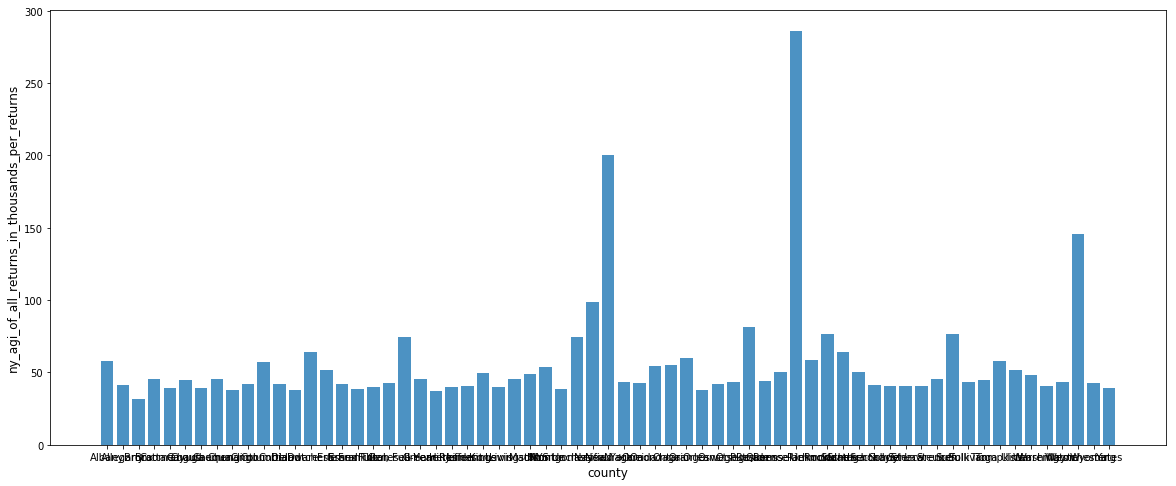

In [83]:
plt.figure(figsize=(20,8))
plt.bar(income2014total['clean_county'], income2014total['ny_agi_of_all_returns_in_thousands_per_returns'], alpha=0.8)
plt.xlabel('county', fontsize=12)
plt.ylabel('ny_agi_of_all_returns_in_thousands_per_returns', fontsize=12)
plt.show()

In [84]:
income2014total.sort_values(['ny_agi_of_all_returns_in_thousands_per_returns'], ascending=False).head()

,deductions_of_all_returns_in_thousands,dependent_exemptions_of_all_returns_in_thousands,disclosure,income_class,income_class_sort_order,number_of_all_returns,ny_agi_of_all_returns_in_thousands,place_of_residence,place_of_residence_sort_order,tax_before_credits_of_all_returns_in_thousands,tax_liability_of_all_returns_in_thousands,tax_year,taxable_income_of_all_returns_in_thousands,clean_county,county_name,ny_agi_of_all_returns_in_thousands_per_returns
895,4.969421e+04,1424.074,NaN,Total,14,3711.0,1.062351e+06,Residence Unknown ++,66,8.333484e+04,7.403500e+04,2014,1.022022e+06,Residence Unknown ++,Residence Unknown ++,286.270865
41,1.171466e+07,283670.654,NaN,Total,14,885829.0,1.774328e+08,New York City - Manhattan,3,1.313224e+07,1.231738e+07,2014,1.700570e+08,New York,New York,200.301428
839,6.933467e+06,262384.878,NaN,Total,14,454120.0,6.609048e+07,Westchester,61,4.399626e+06,3.995073e+06,2014,6.009984e+07,Westchester,Westchester,145.535268
461,1.012681e+07,380261.404,NaN,Total,14,675831.0,6.679532e+07,Nassau,34,3.987948e+06,3.729985e+06,2014,5.823087e+07,Nassau,Nassau,98.834355
587,6.796410e+05,25400.003,NaN,Total,14,46886.0,3.822014e+06,Putnam,43,2.039670e+05,1.814636e+05,2014,3.158691e+06,Putnam,Putnam,81.517166


##### Income Class Proportion

In [40]:
income2014merged = income2014.merge(income2014total[['place_of_residence','number_of_all_returns']], on="place_of_residence", how="left")

In [41]:
income2014merged['income_class_proportion'] = income2014merged['number_of_all_returns_x']/income2014merged['number_of_all_returns_y']

In [42]:
income2014merged.head()

,deductions_of_all_returns_in_thousands,dependent_exemptions_of_all_returns_in_thousands,disclosure,income_class,income_class_sort_order,number_of_all_returns_x,ny_agi_of_all_returns_in_thousands,place_of_residence,place_of_residence_sort_order,tax_before_credits_of_all_returns_in_thousands,tax_liability_of_all_returns_in_thousands,tax_year,taxable_income_of_all_returns_in_thousands,county_name,number_of_all_returns_y,income_class_proportion
0,121985.033,1.000,NaN,"Under 5,000",1,115872.0,28535.362,New York City - Bronx,1,133.528,-7226.155,2014,3335.610,Bronx,616640.0,0.187909
1,453287.232,3907.523,NaN,"5,000 - 9,999",2,64472.0,497520.476,New York City - Bronx,1,1613.677,-24640.639,2014,40325.721,Bronx,616640.0,0.104554
2,1222947.457,87664.662,NaN,"10,000 - 19,999",3,125775.0,1848243.085,New York City - Bronx,1,21717.698,-83445.904,2014,537630.966,Bronx,616640.0,0.203968
3,867453.711,73712.451,NaN,"20,000 - 29,999",4,82181.0,2028682.259,New York City - Bronx,1,47154.276,-11812.793,2014,1087516.097,Bronx,616640.0,0.133272
4,713694.013,58814.362,NaN,"30,000 - 39,999",5,64824.0,2259143.529,New York City - Bronx,1,70580.685,38910.764,2014,1486635.154,Bronx,616640.0,0.105125


In [45]:
output = income2014merged[income2014merged.income_class_sort_order != 14][['county_name', 'income_class', 'income_class_proportion']]

In [46]:
output = output[output.county_name != 'NYS Unclassified +']
output = output[output.county_name != 'Residence Unknown ++']
output = output[output.county_name != 'Grand Total, Full-Year Resident']

##### Output Income data to echarts stacked area graph format

In [47]:
income2014merged.income_class_proportion.fillna(0, inplace=True)

In [50]:
county = income2014merged.county_name.unique()
county = county[:62]

In [51]:
county

array(['Bronx', 'Kings', 'New York', 'Queens', 'Richmond', 'Albany',
       'Allegany', 'Broome', 'Cattaraugus', 'Cayuga', 'Chautauqua',
       'Chemung', 'Chenango', 'Clinton', 'Columbia', 'Cortland',
       'Delaware', 'Dutchess', 'Erie', 'Essex', 'Franklin', 'Fulton',
       'Genesee', 'Greene', 'Hamilton', 'Herkimer', 'Jefferson', 'Lewis',
       'Livingston', 'Madison', 'Monroe', 'Montgomery', 'Nassau',
       'Niagara', 'Oneida', 'Onondaga', 'Ontario', 'Orange', 'Orleans',
       'Oswego', 'Otsego', 'Putnam', 'Rensselaer', 'Rockland',
       'St Lawrence', 'Saratoga', 'Schenectady', 'Schoharie', 'Schuyler',
       'Seneca', 'Steuben', 'Suffolk', 'Sullivan', 'Tioga', 'Tompkins',
       'Ulster', 'Warren', 'Washington', 'Wayne', 'Westchester',
       'Wyoming', 'Yates'], dtype=object)

In [52]:
income_class = income2014merged.income_class.unique()
income_class = income_class[:13]

In [53]:
income_class

array(['Under 5,000', '5,000 - 9,999', '10,000 - 19,999',
       '20,000 - 29,999', '30,000 - 39,999', '40,000 - 49,999',
       '50,000 - 59,999', '60,000 - 74,999', '75,000 - 99,999',
       '100,000 - 199,999', '200,000 - 249,999', '250,000 - 499,999',
       '500,000 and over'], dtype=object)

In [54]:
for income in income_class:
    result = income2014merged[income2014merged.income_class == income].income_class_proportion.values
#     result = [ '%.2f' % elem for elem in result ]
    print(income, "\n", *result, sep=",")

Under 5,000,
,0.18790866632070577,0.14156919970937817,0.12875735610371752,0.144209707265083,0.15552135548083,0.15226317602480194,0.1826029581569253,0.16818020731815364,0.17737161687974856,0.15712659447152574,0.177776565568405,0.16804393167357498,0.17296925195043597,0.17196245586842332,0.15869919852471806,0.148520268589903,0.19542372003934358,0.14763091891400384,0.15854069459979314,0.1852375899068506,0.19248458241873107,0.1631416097995168,0.16453697583902474,0.1752118339796065,0.21231828615149195,0.1603985615822595,0.16302627413738524,0.16070460704607045,0.16016511100368153,0.152048946112213,0.1493000121035371,0.16394107311798892,0.1383023270610552,0.1646210617090829,0.1715799376144972,0.15321179332563142,0.15425605128104292,0.13766261912358752,0.1680581586868859,0.15956421702621384,0.1771967760959308,0.1436889476602824,0.15472000652253673,0.1364486116223844,0.17919738319582093,0.14746714611406647,0.14788808762131975,0.17923250564334087,0.1631196949194243,0.1766175874645414,0.1681292757

##### Output Income data to echarts heat map format

In [55]:
county_map = {}
for i, c in enumerate(county):
    county_map[c] = i
income_map = {}
for i, income in enumerate(income_class):
    income_map[income] = i

In [57]:
output['county_code'] = [county_map[i] for i in output.county_name]

In [58]:
output['income_code'] = [income_map[i] for i in output.income_class]

In [59]:
output[['county_code', 'income_code', 'income_class_proportion']].fillna(0).values.tolist()

[[0.0, 0.0, 0.18790866632070577],
 [0.0, 1.0, 0.10455371043072133],
 [0.0, 2.0, 0.20396827970939285],
 [0.0, 3.0, 0.13327224961079398],
 [0.0, 4.0, 0.10512454592631033],
 [0.0, 5.0, 0.07702062791904515],
 [0.0, 6.0, 0.05494940321743643],
 [0.0, 7.0, 0.047797742605085625],
 [0.0, 8.0, 0.0434645822522055],
 [0.0, 9.0, 0.036494551115723924],
 [0.0, 10.0, 0.0025071354436948623],
 [0.0, 11.0, 0.0021682018681888947],
 [0.0, 12.0, 0.0007703035806953814],
 [1.0, 0.0, 0.14156919970937817],
 [1.0, 1.0, 0.09558277670351566],
 [1.0, 2.0, 0.18142339681387815],
 [1.0, 3.0, 0.12823204764511104],
 [1.0, 4.0, 0.09737676026950166],
 [1.0, 5.0, 0.0753850870943001],
 [1.0, 6.0, 0.05809185863550067],
 [1.0, 7.0, 0.0597566964697531],
 [1.0, 8.0, 0.06260229527985528],
 [1.0, 9.0, 0.07136048439313367],
 [1.0, 10.0, 0.009428516958943079],
 [1.0, 11.0, 0.013128937517186485],
 [1.0, 12.0, 0.006061942509942904],
 [2.0, 0.0, 0.12875735610371752],
 [2.0, 1.0, 0.06798603342180037],
 [2.0, 2.0, 0.11590611732061154],


##### Output Income data to echarts treemap format

In [60]:
import squarify

In [61]:
medicaid = income2014[income2014.income_class_sort_order <= 3]
medicaid.head()

,deductions_of_all_returns_in_thousands,dependent_exemptions_of_all_returns_in_thousands,disclosure,income_class,income_class_sort_order,number_of_all_returns,ny_agi_of_all_returns_in_thousands,place_of_residence,place_of_residence_sort_order,tax_before_credits_of_all_returns_in_thousands,tax_liability_of_all_returns_in_thousands,tax_year,taxable_income_of_all_returns_in_thousands,county_name
0,121985.033,1.000,NaN,"Under 5,000",1,115872.0,28535.362,New York City - Bronx,1,133.528,-7226.155,2014,3335.610,Bronx
1,453287.232,3907.523,NaN,"5,000 - 9,999",2,64472.0,497520.476,New York City - Bronx,1,1613.677,-24640.639,2014,40325.721,Bronx
2,1222947.457,87664.662,NaN,"10,000 - 19,999",3,125775.0,1848243.085,New York City - Bronx,1,21717.698,-83445.904,2014,537630.966,Bronx
14,210754.680,3.276,NaN,"Under 5,000",1,161141.0,-897637.384,New York City - Kings,2,246.895,-12324.264,2014,6164.295,Kings
15,755522.823,2333.442,NaN,"5,000 - 9,999",2,108797.0,830105.363,New York City - Kings,2,2892.406,-29103.060,2014,72249.098,Kings


In [62]:
NYS = medicaid.groupby('county_name').number_of_all_returns.sum().reset_index()
NYS = NYS[NYS.county_name.isin(county)]

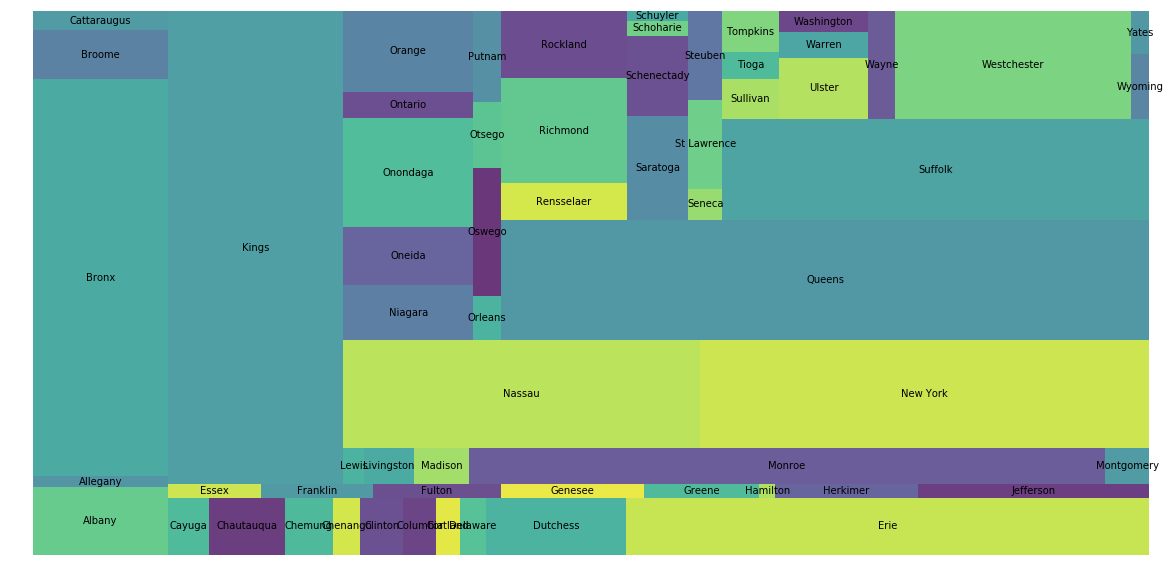

In [63]:
plt.figure(figsize=(20,10))
squarify.plot(sizes=NYS.number_of_all_returns, label=NYS.county_name, alpha=.8 )
plt.axis('off')
plt.show()

#### Joined PPV dataset and Income dataset

In [86]:
joined_data_income_class=joinedppv.merge(income2014total, right_on='clean_county', left_on='patient_county_name', how='outer')

In [99]:
joined_data_income_class = joined_data_income_class[~pd.isnull(joined_data_income_class.patient_county_name)]

##### Output data to echarts scatter plot format

In [100]:
joined_data_income_class[['ny_agi_of_all_returns_in_thousands_per_returns','observed_rate_per_100_medicaid']].values

array([[ 58.09676626,  48.78      ],
       [ 41.5219476 ,  36.88      ],
       [ 31.43718504,  37.        ],
       [ 45.15411208,  29.77      ],
       [ 38.98639468,  37.26      ],
       [ 44.78457947,  39.64      ],
       [ 39.55705751,  44.97      ],
       [ 45.58743343,  57.1       ],
       [ 37.97313515,  50.79      ],
       [ 42.28126023,  44.23      ],
       [ 57.57493755,  39.82      ],
       [ 41.82408326,  30.07      ],
       [ 38.07209308,  47.78      ],
       [ 64.32467083,  33.15      ],
       [ 51.69017216,  28.77      ],
       [ 42.31738256,  49.82      ],
       [ 38.51786297,  36.71      ],
       [ 39.63324253,  49.14      ],
       [ 42.46400767,  43.41      ],
       [ 45.65415199,  29.        ],
       [ 36.98552678,  15.94      ],
       [ 39.66530712,  31.51      ],
       [ 40.73977347,  52.23      ],
       [ 49.96940565,  24.44      ],
       [ 40.29452023,  39.83      ],
       [ 45.21195426,  32.22      ],
       [ 48.69633516,  45.48      ],
 

In [101]:
joined_data_income_class[['ny_agi_of_all_returns_in_thousands_per_returns','observed_rate_per_100_all_payer']].values

array([[ 58.09676626,  22.01      ],
       [ 41.5219476 ,  29.66      ],
       [ 31.43718504,  41.09      ],
       [ 45.15411208,  24.09      ],
       [ 38.98639468,   7.77      ],
       [ 44.78457947,  22.52      ],
       [ 39.55705751,  19.82      ],
       [ 45.58743343,  37.43      ],
       [ 37.97313515,  39.85      ],
       [ 42.28126023,  32.67      ],
       [ 57.57493755,  23.39      ],
       [ 41.82408326,  33.49      ],
       [ 38.07209308,  31.82      ],
       [ 64.32467083,  21.55      ],
       [ 51.69017216,  24.52      ],
       [ 42.31738256,  30.32      ],
       [ 38.51786297,  11.83      ],
       [ 39.63324253,  42.26      ],
       [ 42.46400767,  22.33      ],
       [ 45.65415199,  18.78      ],
       [ 36.98552678,  14.35      ],
       [ 39.66530712,  22.84      ],
       [ 40.73977347,  35.        ],
       [ 49.96940565,  25.57      ],
       [ 40.29452023,  24.43      ],
       [ 45.21195426,  16.29      ],
       [ 48.69633516,  23.87      ],
 

##### Output data to d3 pie plot format

In [64]:
income2014['income_class_order'] = np.where(income2014.income_class_sort_order <= 2, 'LIS',
                                            np.where(income2014.income_class_sort_order == 3, 'LIF', 'non-medicaid'))
income2014pro = income2014.groupby(['county_name', 'income_class_order']).number_of_all_returns.sum().reset_index()

In [65]:
income2014pro = income2014pro.pivot(index='county_name', columns='income_class_order', values='number_of_all_returns') \
                             .reset_index()

In [66]:
income2014json = '['

for rowidx in range(len(income2014pro)):
    county = '"county_name":' \
            + '"{}"'.format(income2014pro.loc[rowidx].county_name)
    proportion = '"proportion":{' \
            + '"LIS":' + str(income2014pro.loc[rowidx, "LIS"]) \
            + ',"LIF":' + str(income2014pro.loc[rowidx, "LIF"]) \
            + ',"non-medicaid":' + str(income2014pro.loc[rowidx, "non-medicaid"]) + '}'

    income2014json += '{' + county + ',' + proportion + '},'
income2014json += ']'
print(income2014json)

[{"county_name":"Albany","proportion":{"LIS":33799.0,"LIF":18726.0,"non-medicaid":237775.0}},{"county_name":"Allegany","proportion":{"LIS":5035.0,"LIF":2959.0,"non-medicaid":28380.0}},{"county_name":"Bronx","proportion":{"LIS":180344.0,"LIF":125775.0,"non-medicaid":927161.0}},{"county_name":"Broome","proportion":{"LIS":23834.0,"LIF":14315.0,"non-medicaid":142443.0}},{"county_name":"Cattaraugus","proportion":{"LIS":8929.0,"LIF":5490.0,"non-medicaid":51127.0}},{"county_name":"Cayuga","proportion":{"LIS":8503.0,"LIF":5184.0,"non-medicaid":54831.0}},{"county_name":"Chautauqua","proportion":{"LIS":15302.0,"LIF":9484.0,"non-medicaid":85206.0}},{"county_name":"Chemung","proportion":{"LIS":9803.0,"LIF":5966.0,"non-medicaid":59985.0}},{"county_name":"Chenango","proportion":{"LIS":5705.0,"LIF":3223.0,"non-medicaid":34652.0}},{"county_name":"Clinton","proportion":{"LIS":8896.0,"LIF":5147.0,"non-medicaid":55635.0}},{"county_name":"Columbia","proportion":{"LIS":6857.0,"LIF":3971.0,"non-medicaid":45

##### Check correlations

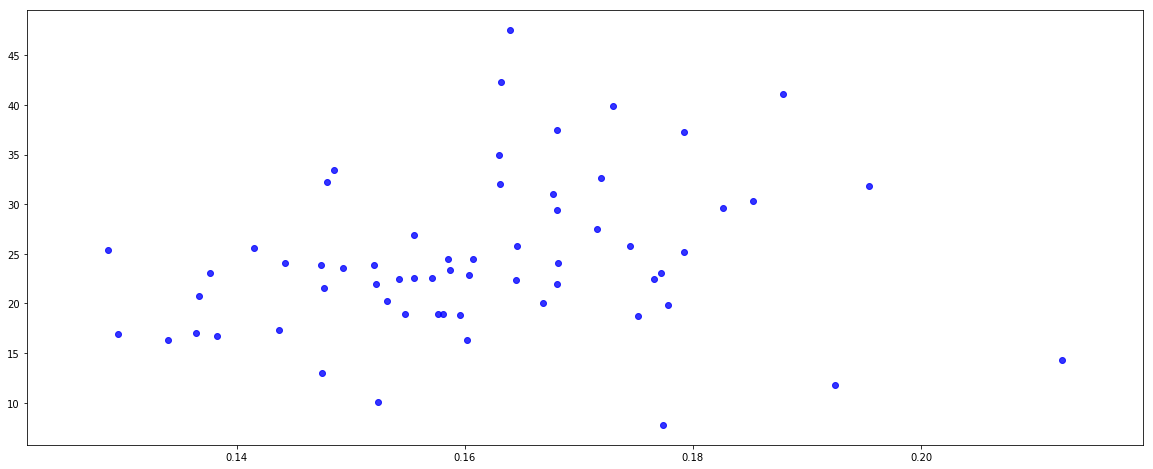

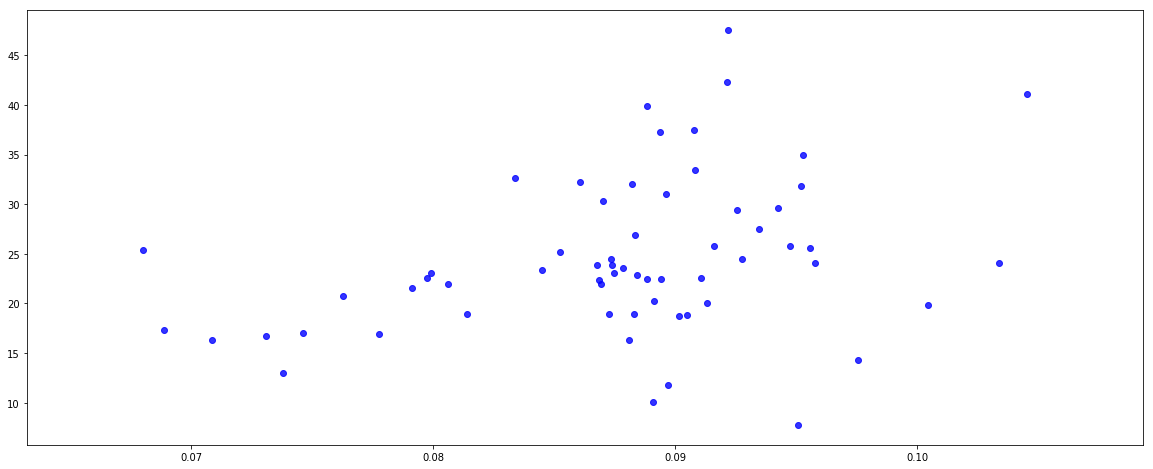

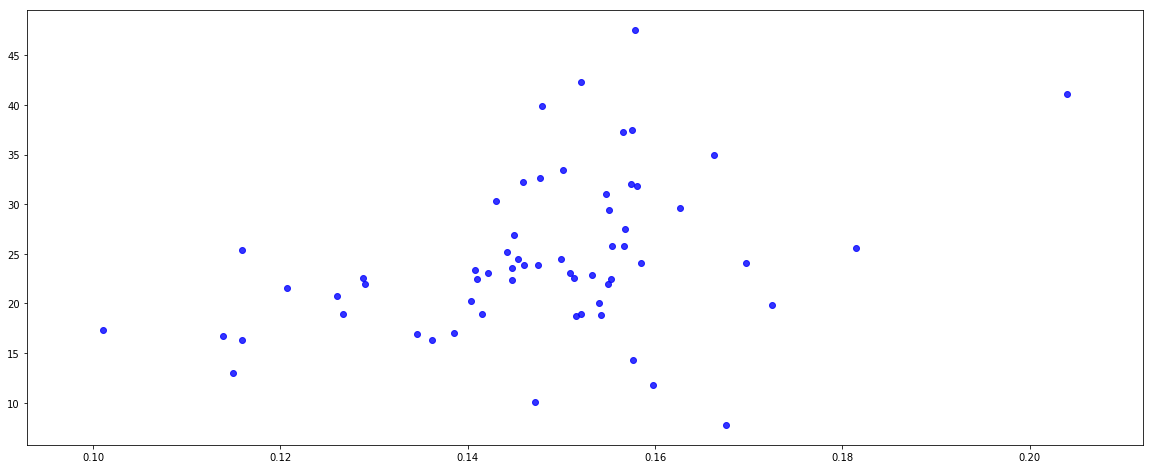

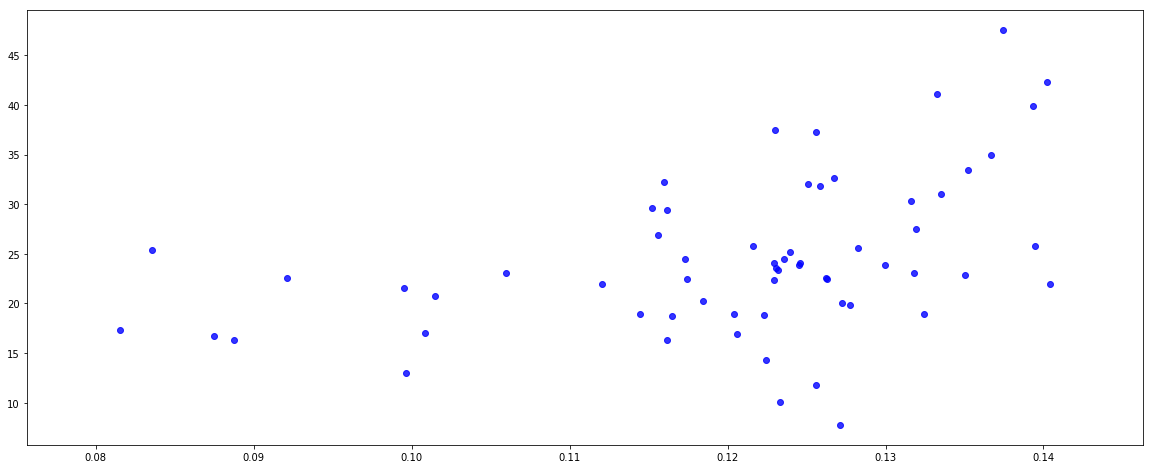

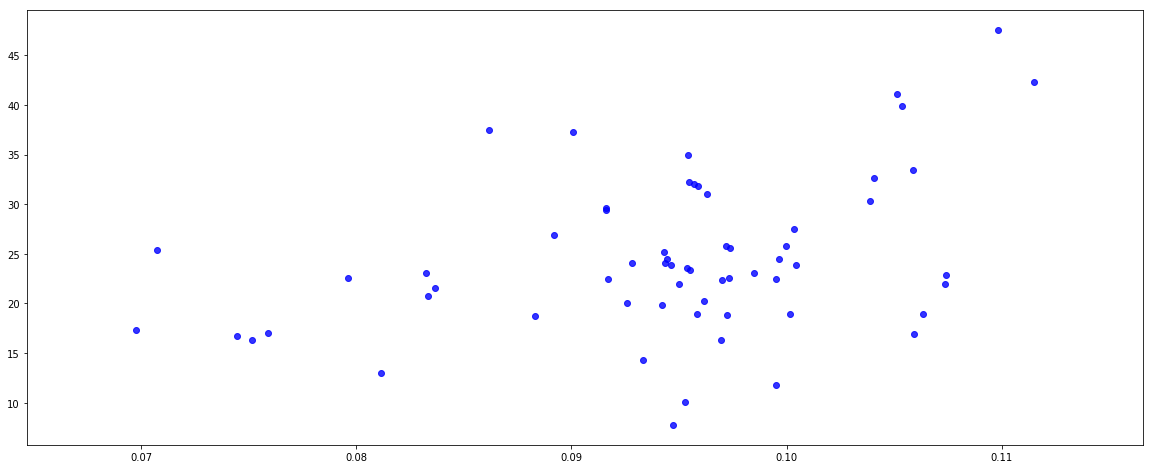

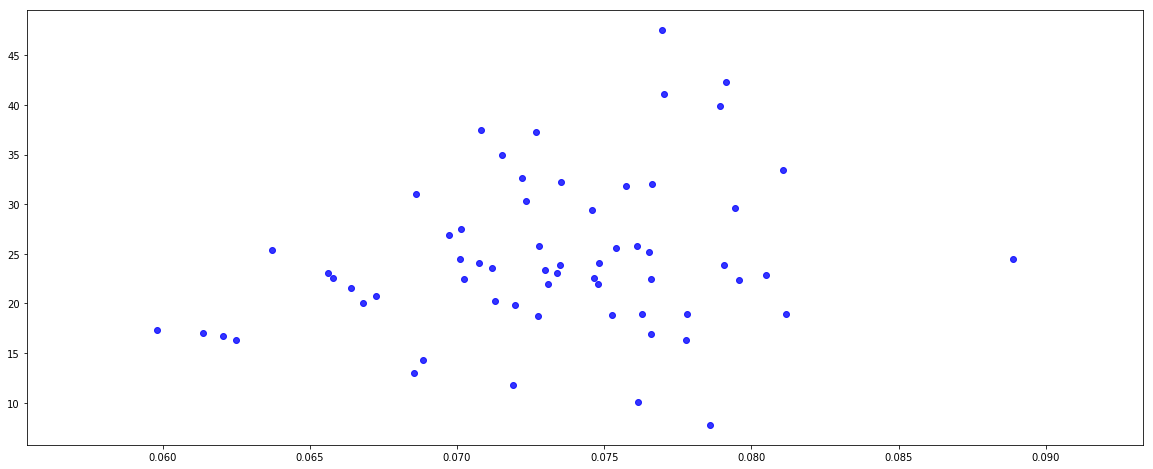

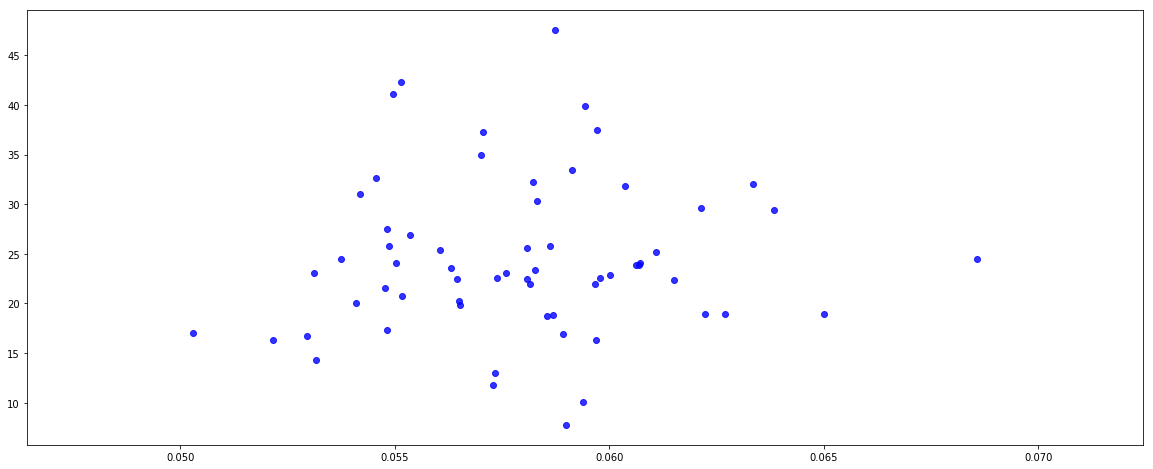

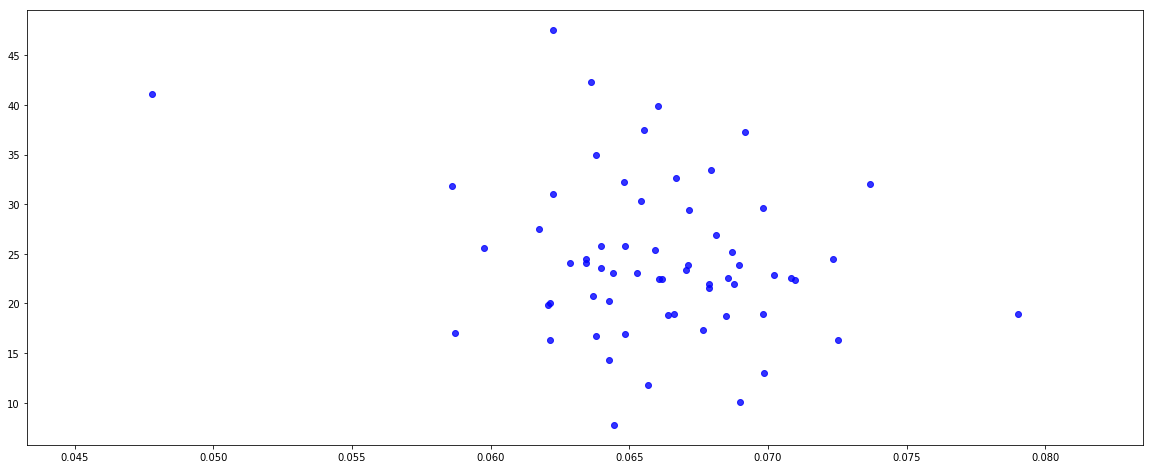

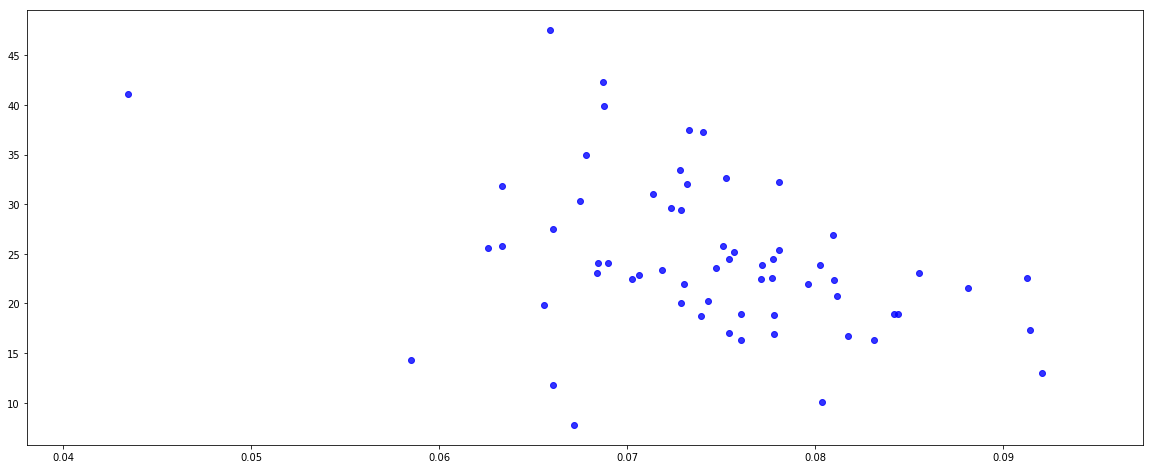

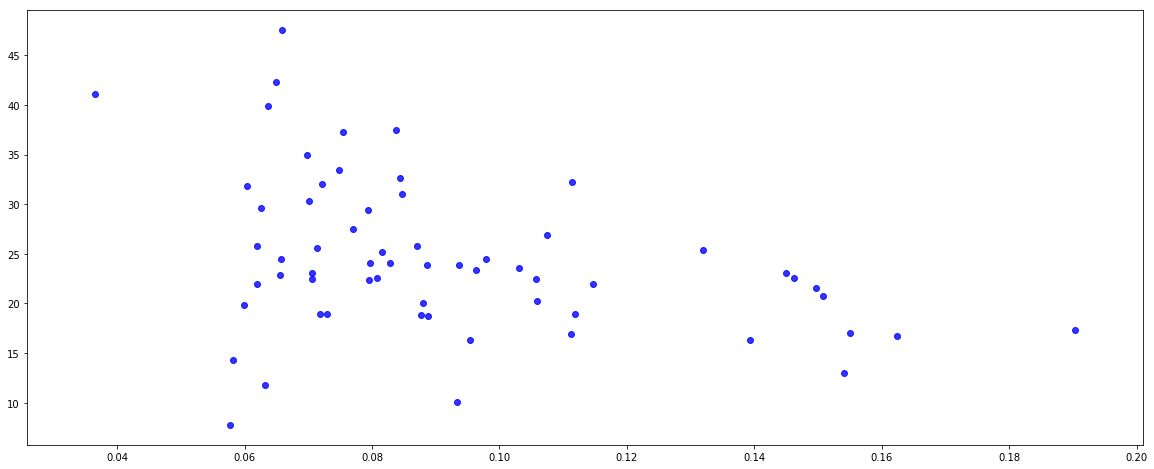

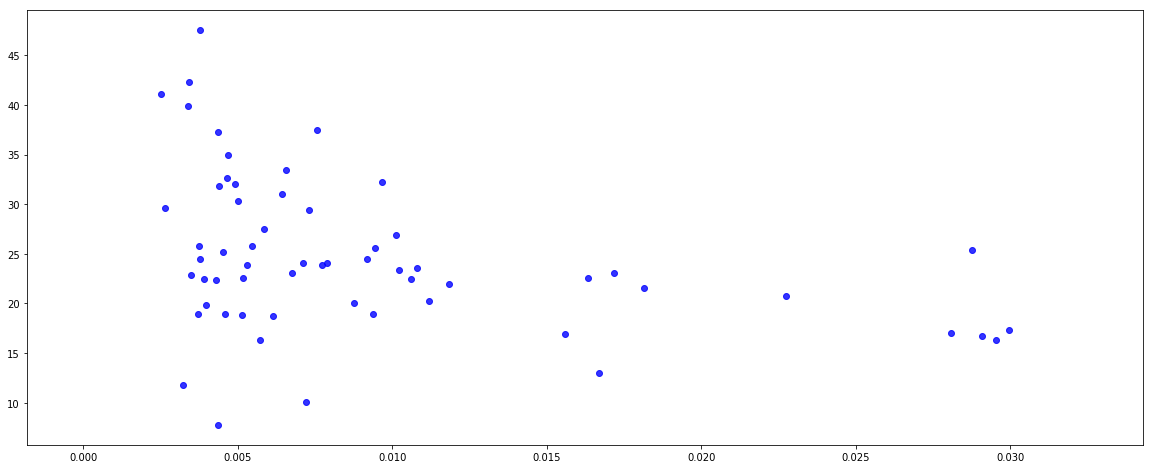

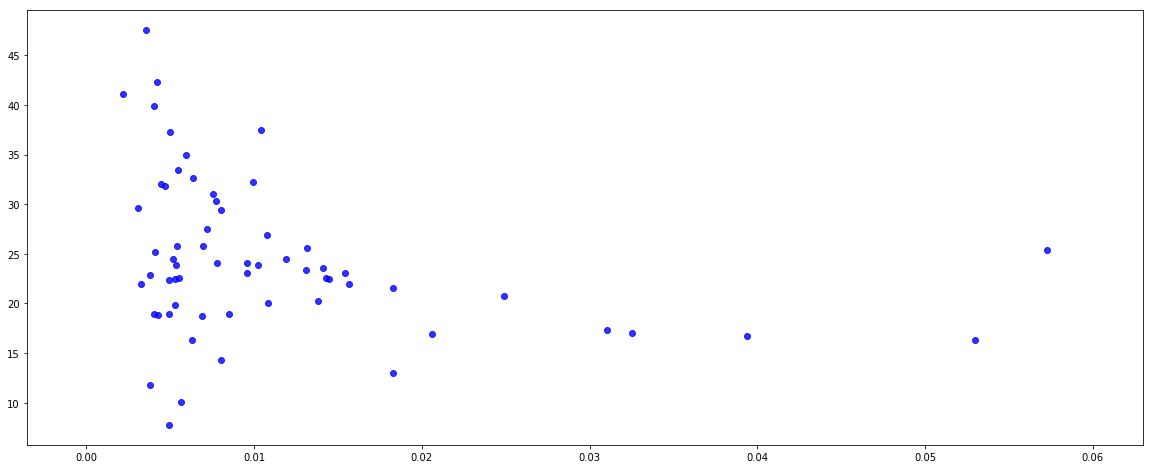

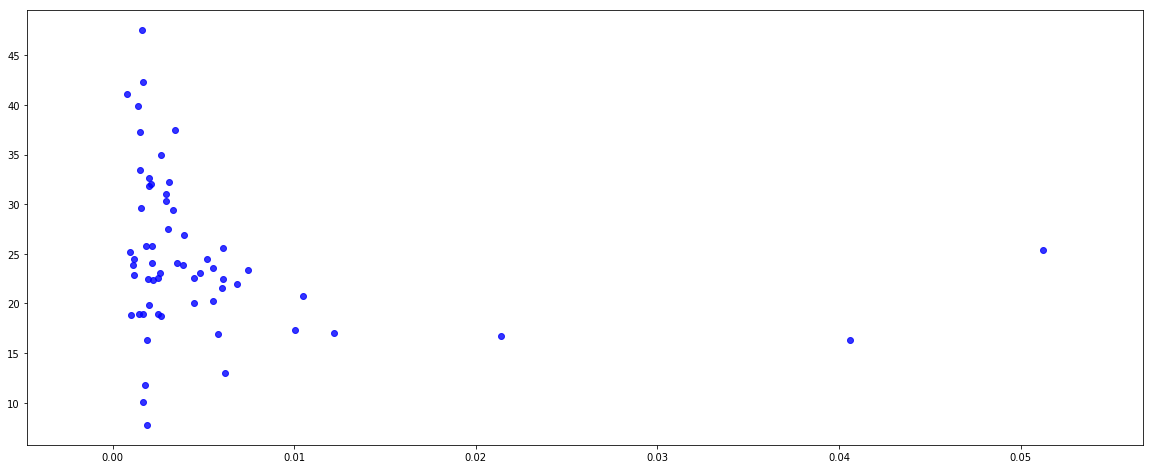

In [238]:
# create plot
for i in range(13):
    data = joined_data_income_class[joined_data_income_class.income_class_sort_order == i+1]
    fig, ax = plt.subplots(figsize=(20,8))
    ax.scatter(data.income_class_proportion, data.observed_rate_per_100,
    alpha=opacity,
    color='b',
    label='expected')
    plt.show()

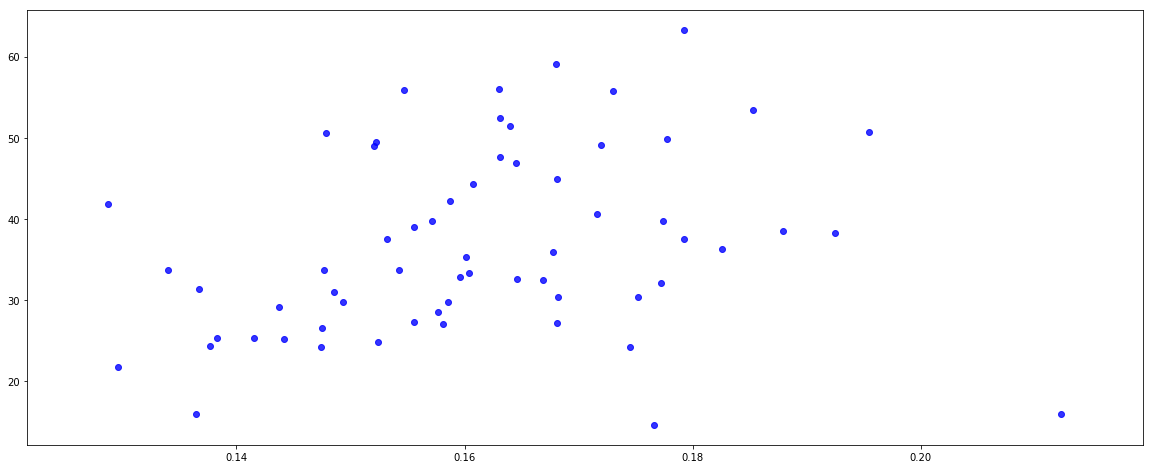

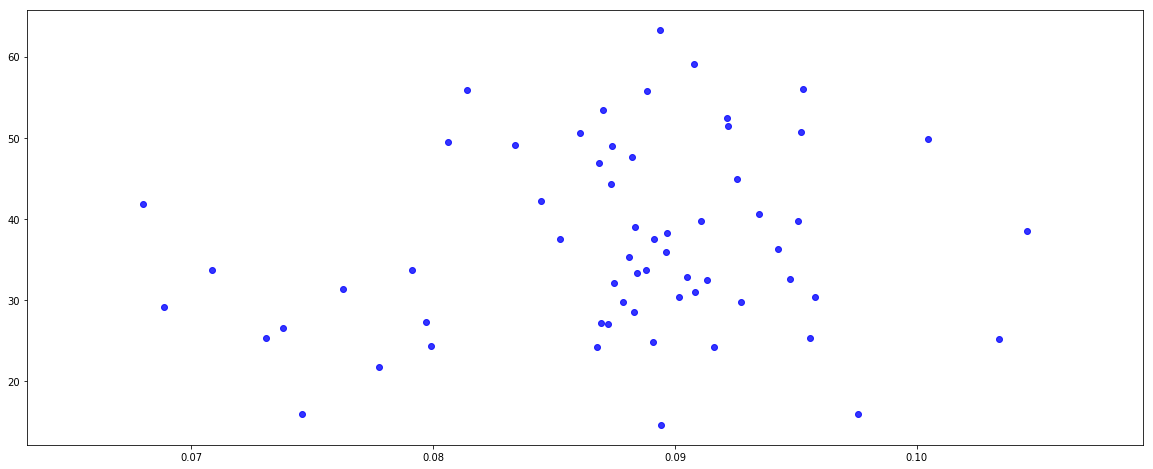

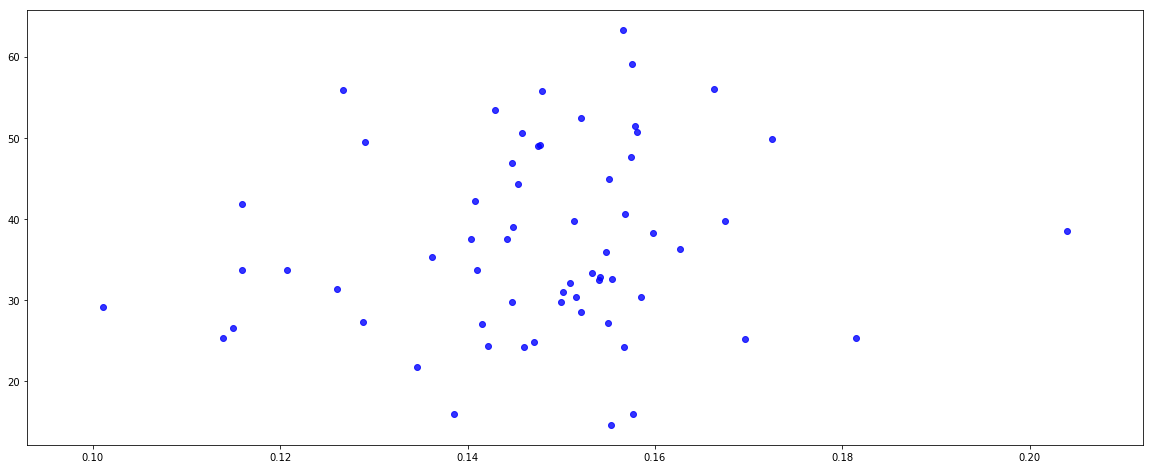

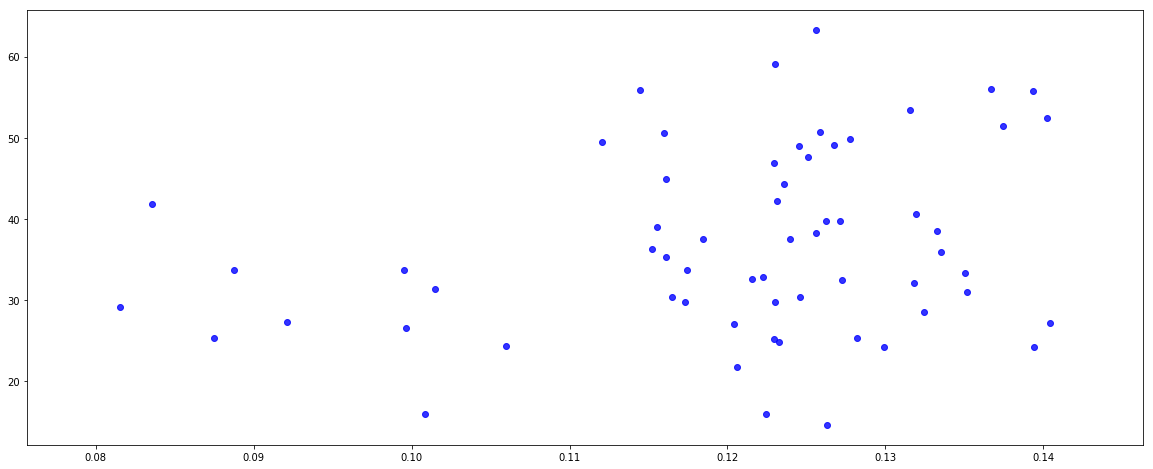

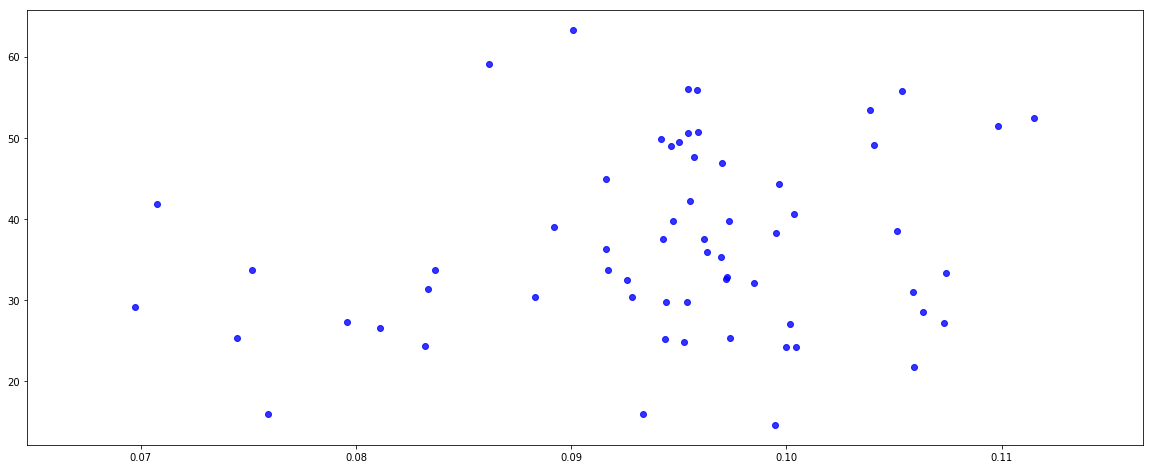

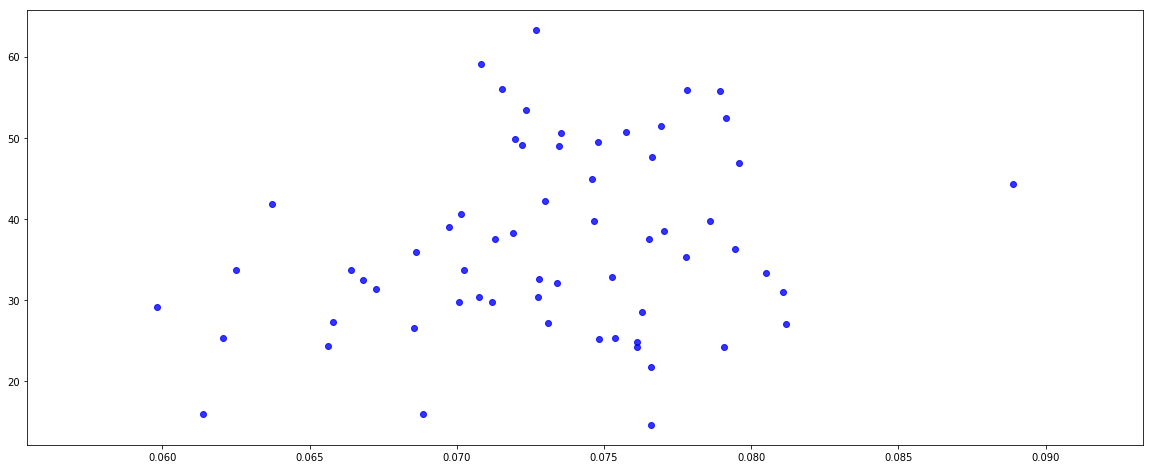

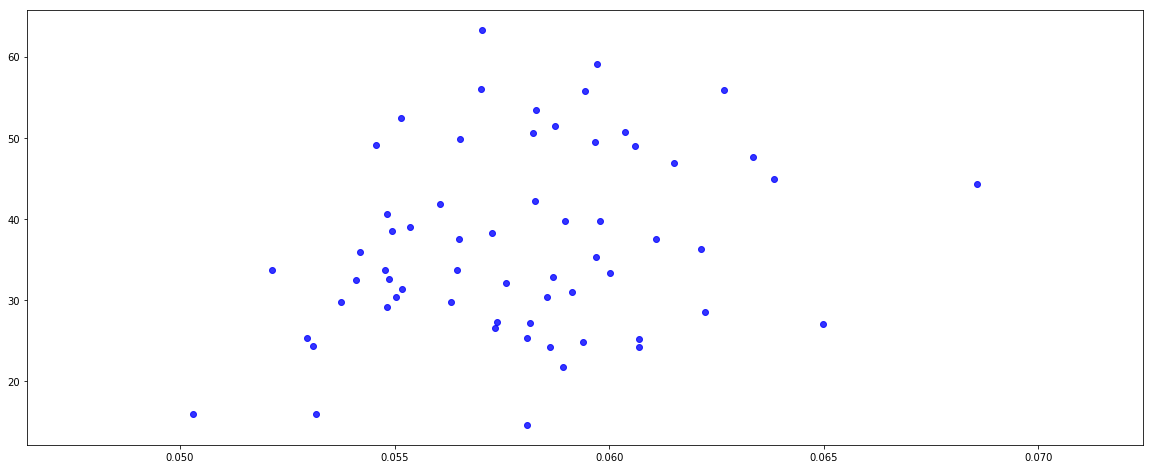

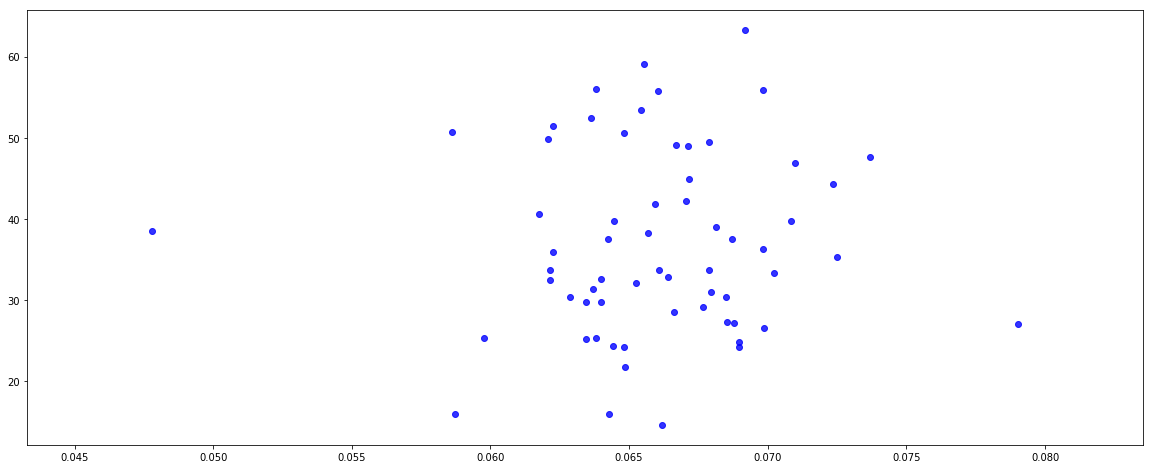

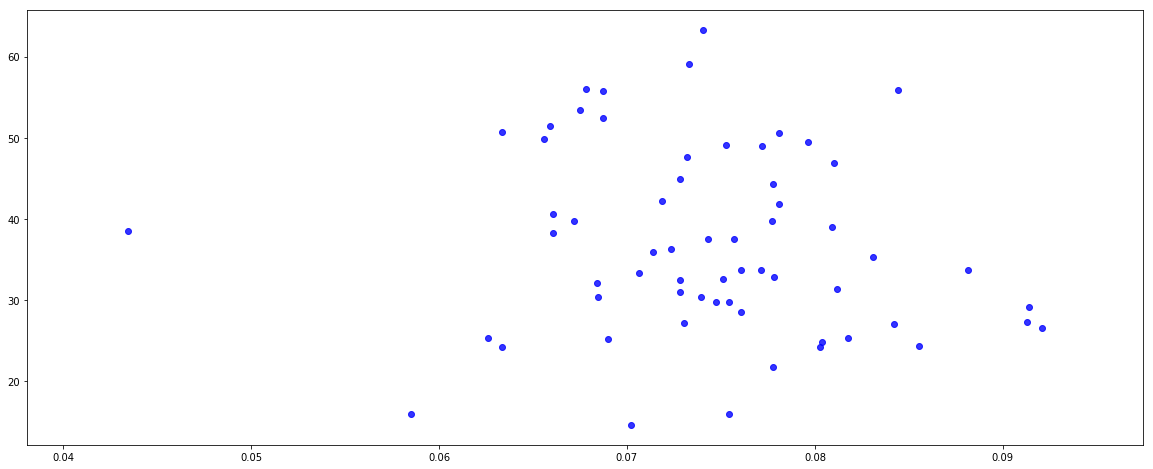

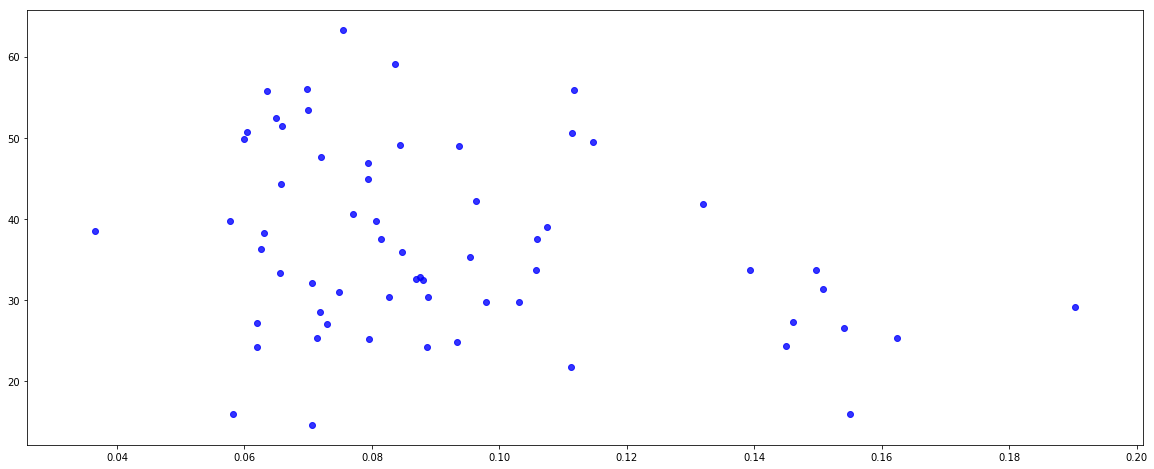

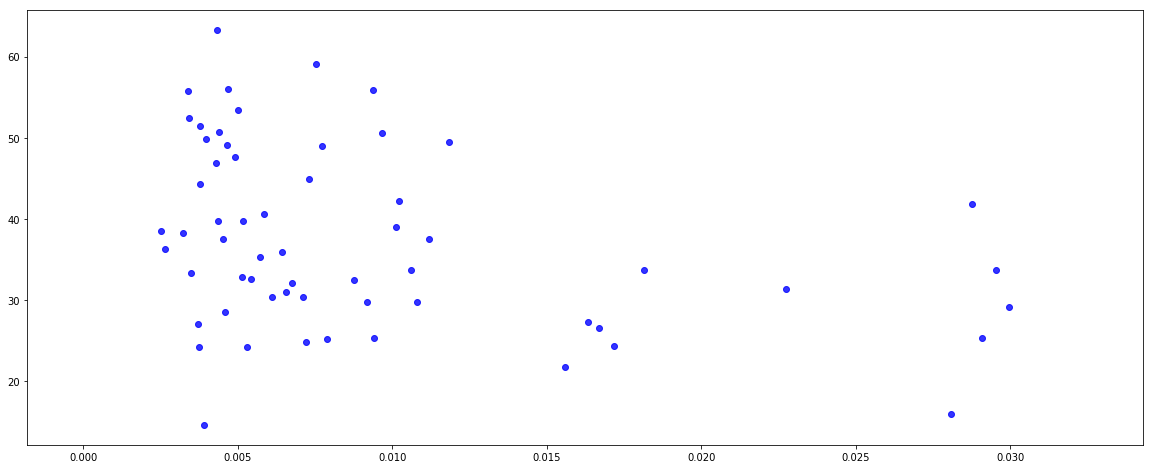

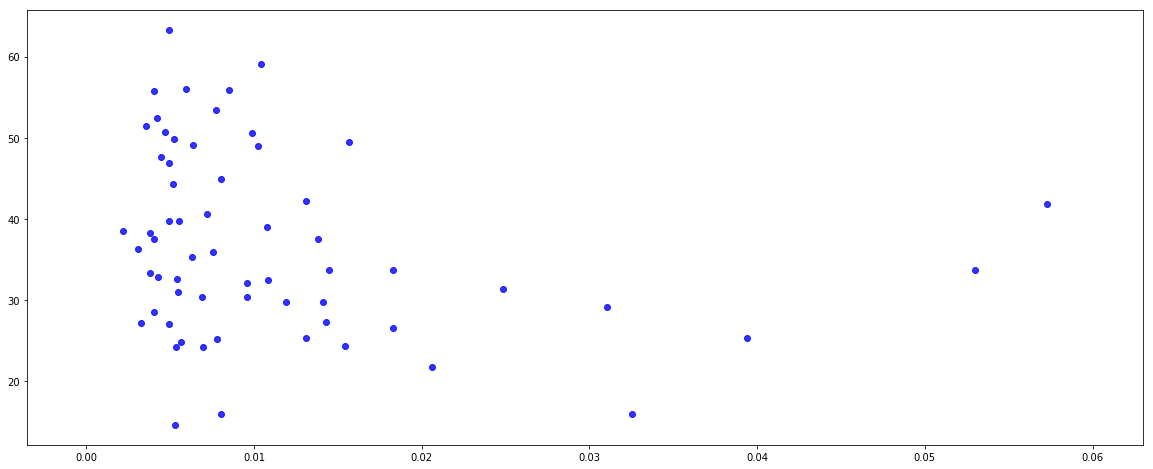

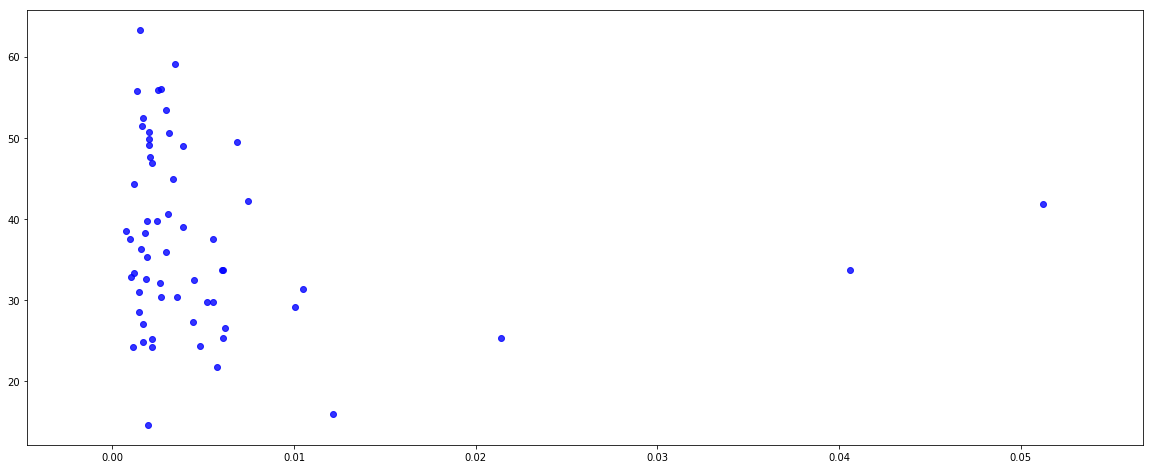

In [214]:
# create plot
total = joined_data_income_class[joined_data_income_class.dual_status == 'Non-Dual']
for i in range(13):
    data = total[total.income_class_sort_order == i+1]
    fig, ax = plt.subplots(figsize=(20,8))
    ax.scatter(data.income_class_proportion, data.observed_rate_per_100,
    alpha=opacity,
    color='b',
    label='expected')
    plt.show()